In [79]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, Input, GlobalAveragePooling2D,Dense, Activation, Flatten, BatchNormalization
from keras.applications.mobilenet import relu6, DepthwiseConv2D
from keras import Model
from keras import optimizers
import matplotlib.pyplot as plt

In [65]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.reshape((60000,28,28,1)) / 255.0
test_x = test_x.reshape((10000,28,28,1)) / 255.0

train_y = keras.utils.to_categorical(train_y, num_classes = 10)
test_y = keras.utils.to_categorical(test_y, num_classes = 10)
print (train_y.shape)
print (test_y.shape)

(60000, 10)
(10000, 10)


#### DepthwiseConv2D
```py
class DepthwiseConv2D(Conv2D):
    """Depthwise separable 2D convolution.
    Depthwise Separable convolutions consist in performing
    just the first step in a depthwise spatial convolution
    (which acts on each input channel separately).
    It does not perform the pointwise convolution (second step).
    The `depth_multiplier` argument controls how many
    output channels are generated per input channel in the depthwise step.
    # Arguments
        kernel_size: An integer or tuple/list of 2 integers, specifying the
            width and height of the 2D convolution window.
            Can be a single integer to specify the same value for
            all spatial dimensions.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.
        padding: one of `"valid"` or `"same"` (case-insensitive).
        depth_multiplier: The number of depthwise convolution output channels
            for each input channel.
            The total number of depthwise convolution output
            channels will be equal to `filterss_in * depth_multiplier`.
        data_format: A string,
            one of `channels_last` (default) or `channels_first`.
            The ordering of the dimensions in the inputs.
            `channels_last` corresponds to inputs with shape
            `(batch, height, width, channels)` while `channels_first`
            corresponds to inputs with shape
            `(batch, channels, height, width)`.
            It defaults to the `image_data_format` value found in your
            Keras config file at `~/.keras/keras.json`.
            If you never set it, then it will be "channels_last".
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you don't specify anything, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        depthwise_initializer: Initializer for the depthwise kernel matrix
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        depthwise_regularizer: Regularizer function applied to
            the depthwise kernel matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        depthwise_constraint: Constraint function applied to
            the depthwise kernel matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
    # Input shape
        4D tensor with shape:
        `(batch, channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, rows, cols, channels)` if data_format='channels_last'.
    # Output shape
        4D tensor with shape:
        `(batch, filters, new_rows, new_cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(batch, new_rows, new_cols, filters)` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to padding.
    """
```

In [8]:
def MobileNetV1(input_shape, k):
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(inputs)
    x = DepthwiseConv2D(kernel_size=(3,3),padding='same', activation='relu',)(x)
    x = Conv2D(filters=64, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3), padding='same', activation='relu',)(x)
    x = Conv2D(filters=128, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3), strides=(2,2),padding='same', activation='relu',)(x)
    x = Conv2D(filters=128, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3),padding='same', activation='relu',)(x)
    x = Conv2D(filters=256, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3), strides=(2,2),padding='same', activation='relu',)(x)
    x = Conv2D(filters=256, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3),padding='same', activation='relu',)(x)
    x = Conv2D(filters=512, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3), strides=(2,2),padding='same', activation='relu',)(x)
    x = Conv2D(filters=512, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3), strides=(2,2),padding='same', activation='relu',)(x)
    x = Conv2D(filters=1024, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = DepthwiseConv2D(kernel_size=(3,3),padding='same', activation='relu',)(x)
    x = Conv2D(filters=1024, kernel_size=(1,1),padding='same', activation='relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(k, activation='softmax')(x)
    model = Model(inputs, x)
    return model

In [11]:
def NaiveConvNet(input_shape, k):
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(inputs)
    x = Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu')(x)
    x = Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu')(x)
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu')(x)
    x = Conv2D(filters=256, kernel_size=(3,3),padding='same', activation='relu')(x)
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu')(x)
    x = Conv2D(filters=512, kernel_size=(3,3),padding='same', activation='relu')(x)
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu')(x)
    x = Conv2D(filters=1024, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu')(x)
    x = Conv2D(filters=1024, kernel_size=(3,3),padding='same', activation='relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(k, activation='softmax')(x)
    model = Model(inputs, x)
    return model

In [14]:
MobileNet_v1_model = MobileNetV1((224,224,3), 1000)
MobileNet_v1_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
depthwise_conv2d_22 (Depthwi (None, 112, 112, 32)      320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 112, 112, 64)      2112      
_________________________________________________________________
depthwise_conv2d_23 (Depthwi (None, 112, 112, 64)      640       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 112, 112, 128)     8320      
_________________________________________________________________
depthwise_conv2d_24 (Depthwi (None, 56, 56, 128)       1280      
__________

In [15]:
NaiveConvNet_model = NaiveConvNet((224,224,3), 1000)
NaiveConvNet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 112, 112, 32)      896       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 56, 56, 128)       147584    
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 256)       590080    
__________

In [98]:
def Simple_MobileNetV1(input_shape, k):
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name='m_conv_1')(inputs)
    x = DepthwiseConv2D(kernel_size=(3,3),padding='same', activation='relu', name = 'm_dc_2')(x)
    x = Conv2D(filters=64, kernel_size=(1,1),padding='same', activation='relu', name = 'm_pc_2')(x)
    x = DepthwiseConv2D(kernel_size=(3,3), padding='same', activation='relu', name = 'm_dc_3')(x)
    x = Conv2D(filters=128, kernel_size=(1,1),padding='same', activation='relu', name = 'm_pc_3')(x)
    x = DepthwiseConv2D(kernel_size=(3,3), strides=(2,2),padding='same', activation='relu', name = 'm_dc_4')(x)
    x = Conv2D(filters=128, kernel_size=(1,1),padding='same', activation='relu', name = 'm_pc_4')(x)
    x = GlobalAveragePooling2D(name='m_gap')(x)
    x = BatchNormalization(name='m_bn_1')(x)
    x = Dense(128, activation='relu', name='m_fc1')(x)
    x = BatchNormalization(name='m_bc_2')(x)
    x = Dense(k, activation='softmax', name='m_output')(x)
    model = Model(inputs, x)
    return model

In [99]:
Simple_MobileNetV1_model = Simple_MobileNetV1((28,28,1), 10)
Simple_MobileNetV1_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
m_conv_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
m_dc_2 (DepthwiseConv2D)     (None, 14, 14, 32)        320       
_________________________________________________________________
m_pc_2 (Conv2D)              (None, 14, 14, 64)        2112      
_________________________________________________________________
m_dc_3 (DepthwiseConv2D)     (None, 14, 14, 64)        640       
_________________________________________________________________
m_pc_3 (Conv2D)              (None, 14, 14, 128)       8320      
_________________________________________________________________
m_dc_4 (DepthwiseConv2D)     (None, 7, 7, 128)         1280      
__________

In [100]:
Simple_MobileNetV1_model.compile(optimizer=optimizers.RMSprop(0.001), loss='categorical_crossentropy', metrics=['acc'])
Simple_MobileNetV1_history = Simple_MobileNetV1_model.fit(train_x, train_y, epochs=10, batch_size=8)

Epoch 1/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.5256 - acc: 0.8251
Epoch 2/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2198 - acc: 0.9326
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1668 - acc: 0.9492
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.1414 - acc: 0.9583
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1210 - acc: 0.9638
Epoch 6/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1099 - acc: 0.9678
Epoch 7/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1056 - acc: 0.9701
Epoch 8/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0976 - acc: 0.9721
Epoch 9/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0924 - acc: 0.9732
Epoch 10/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0899 - acc: 0.9746

In [96]:
def Simple_NaiveConvNet(input_shape, k):
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name='n_conv_1')(inputs)
    x = Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu', name='n_conv_2')(x)
    x = Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu', name='n_conv_3')(x)
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(2,2),padding='same', activation='relu', name='n_conv_4')(x)
    x = GlobalAveragePooling2D(name='n_gap')(x)
    x = BatchNormalization(name='n_bn_1')(x)
    x = Dense(128, activation='relu', name='n_fc1')(x)
    x = BatchNormalization(name='n_bc_2')(x)
    x = Dense(k, activation='softmax', name='n_output')(x)
    model = Model(inputs, x)
    return model

In [97]:
Simple_NaiveConvNet_model = Simple_NaiveConvNet((28,28,1), 10)
Simple_NaiveConvNet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
n_conv_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
n_conv_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
n_conv_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
n_conv_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
n_gap (GlobalAveragePooling2 (None, 128)               0         
_________________________________________________________________
n_bn_1 (BatchNormalization)  (None, 128)               512       
__________

In [101]:
Simple_NaiveConvNet_model.compile(optimizer=optimizers.RMSprop(0.001), loss='categorical_crossentropy', metrics=['acc'])
Simple_NaiveConvNet_history = Simple_NaiveConvNet_model.fit(train_x, train_y, epochs=10, batch_size=8)

Epoch 1/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.2385 - acc: 0.9263
Epoch 2/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.1085 - acc: 0.9688
Epoch 3/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0833 - acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0720 - acc: 0.9797
Epoch 5/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0686 - acc: 0.9805
Epoch 6/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0593 - acc: 0.9834
Epoch 7/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0531 - acc: 0.9852
Epoch 8/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0513 - acc: 0.9858
Epoch 9/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0476 - acc: 0.9869
Epoch 10/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0463 - a

In [106]:
s_acc = Simple_NaiveConvNet_history.history['acc']
s_loss = Simple_NaiveConvNet_history.history['loss']

m_acc = Simple_MobileNetV1_history.history['acc']
m_loss = Simple_MobileNetV1_history.history['loss']

epochs = range(1, len(s_acc)+1)

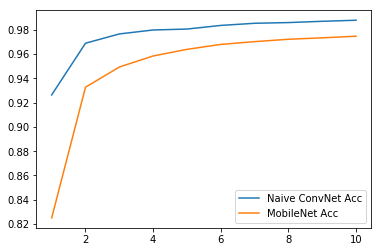

In [107]:
plt.plot(epochs, s_acc, label='Naive ConvNet Acc')
plt.plot(epochs, m_acc, label='MobileNet Acc')
plt.legend()

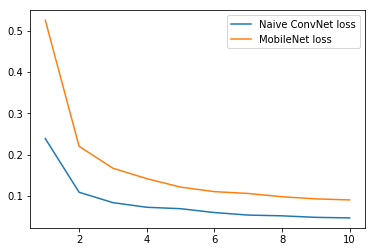

In [108]:
plt.plot(epochs, s_loss, label='Naive ConvNet loss')
plt.plot(epochs, m_loss, label='MobileNet loss')
plt.legend()